<a href="https://colab.research.google.com/github/niaz754/myrepo/blob/main/Simple_Random_Forest_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Classifier

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


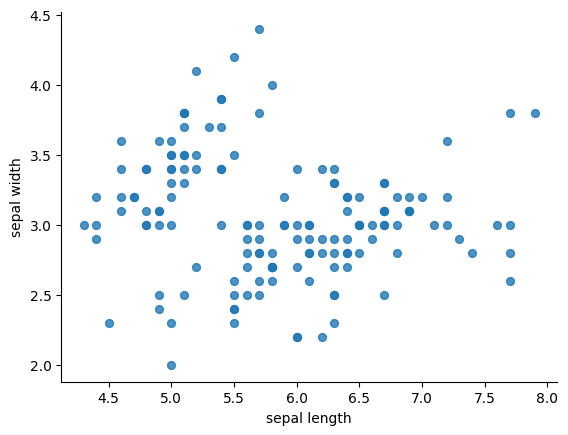

In [24]:
# @title sepal length vs sepal width

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='sepal length', y='sepal width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

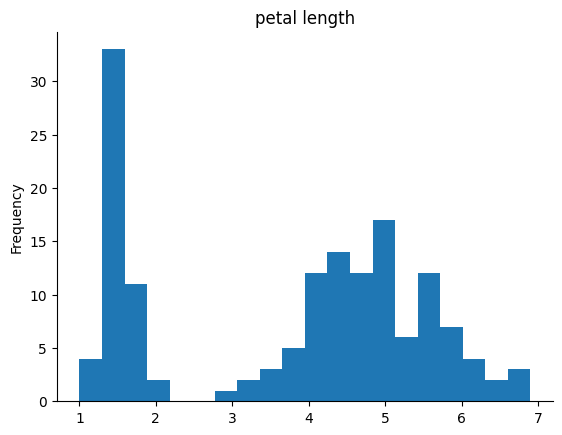

In [23]:
# @title petal length

from matplotlib import pyplot as plt
data['petal length'].plot(kind='hist', bins=20, title='petal length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [8]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'virginica'

## Finding Important Features

In [9]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

,0
petal length (cm),0.439605
petal width (cm),0.395234
sepal length (cm),0.133560
sepal width (cm),0.031600


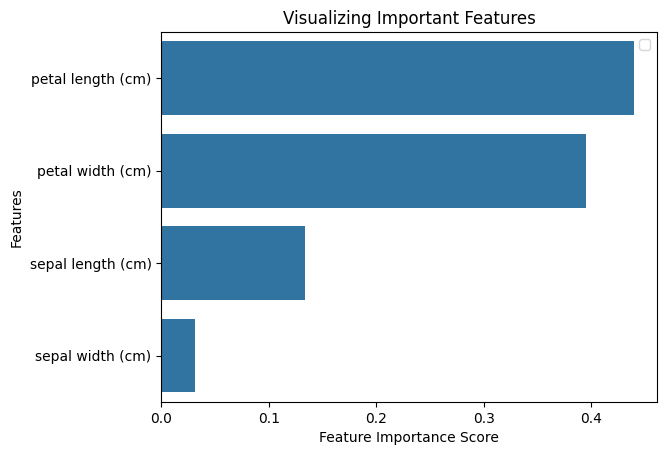

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the Model on Selected Features

We can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


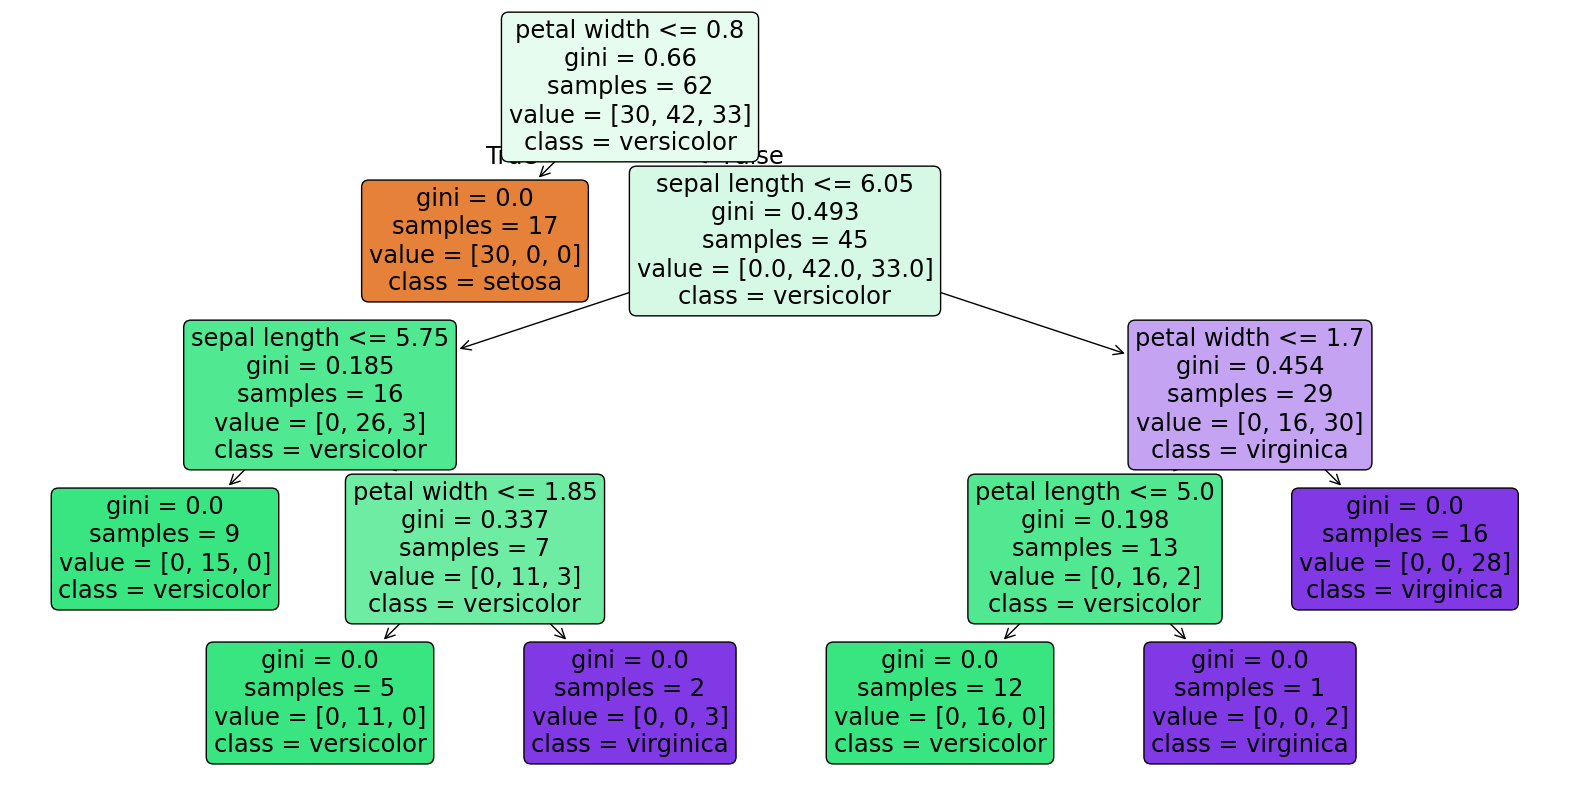

In [28]:
# prompt: can u draw  a graph of the structure of the above algorithm, i.e randomforestclassifier

# The RandomForestClassifier doesn't have a readily visualizable "structure" like a decision tree.
# It's an ensemble of decision trees.  A graph of the entire forest would be impractical.
# Instead, we can visualize the feature importance or individual trees within the forest.

# Visualizing Feature Importance (already present in your code):
# The barplot in your existing code visualizes feature importance.  This shows which features
# contribute most to the model's predictions.  This is a good way to understand the overall
# structure in terms of feature influence.


# Visualizing Individual Decision Trees (example)
# You could visualize a single tree within the RandomForest, which gives you insight into
# how one of the base learners makes its decisions:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your trained RandomForestClassifier
# Select a tree to visualize (e.g. the first one, index 0)
estimator = clf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names = ['petal length', 'petal width', 'sepal length'],  # Your feature names
          class_names = iris.target_names, # Class names
          filled = True,
          rounded=True)
plt.show()

# Note:  The overall RandomForest is not a single tree; its power comes from aggregating
# the predictions of many trees.

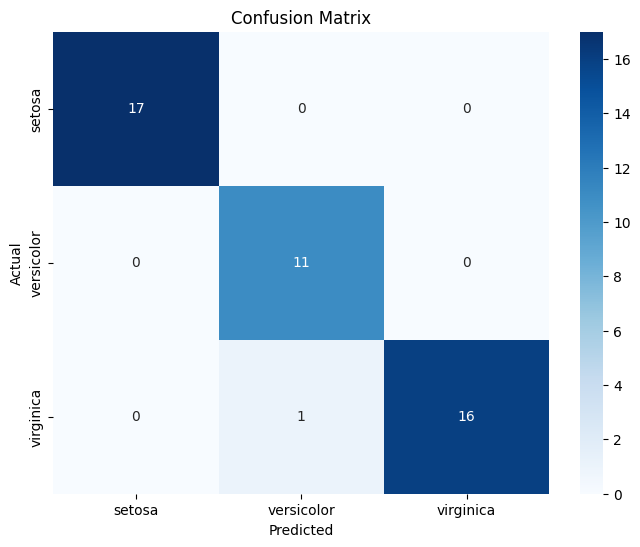

In [25]:
# prompt: can u write the code to generate the conusion matrix for the above trained model

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are already defined from your previous code
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# prompt: now we want to manually test our model i.e we provide values for the features and ask the moodel to classify them  , we want the user to input the value (use input())

# Get user input for features
sepal_length = float(input("Enter sepal length: "))
sepal_width = float(input("Enter sepal width: "))
petal_length = float(input("Enter petal length: "))
petal_width = float(input("Enter petal width: "))

# Make prediction using the trained model
# Note:  clf is assumed to be your trained RandomForestClassifier from the previous code.
# If you are running this in a new session, you'll need to retrain clf.
species_idx = clf.predict([[petal_length, petal_width, sepal_length]])[0]
predicted_species = iris.target_names[species_idx]

# Print the predicted species
print("Predicted species:", predicted_species)

Enter sepal length: 2
Enter sepal width: 3
Enter petal length: 5
Enter petal width: 2
Predicted species: virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
